In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sqlalchemy import create_engine
# MySQL connection credentials
username = "root"
password = "root123"
host = "localhost"
port = 3306
database = "hr(attrition)"  # your database name
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")
df = pd.read_sql("SELECT * FROM hr_main", con=engine)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EnvironmentSatisfaction,Gender,JobLevel,JobRole,JobSatisfaction,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Female,2,Sales Executive,4,...,1,11,1,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,3,Male,2,Research Scientist,2,...,0,23,4,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,4,Male,1,Laboratory Technician,3,...,1,15,2,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Female,1,Research Scientist,3,...,1,11,3,8,3,3,8,7,3,0
4,32,0,Travel_Frequently,Research & Development,2,4,Male,1,Laboratory Technician,4,...,0,13,3,8,2,2,7,7,3,6


# Target Variable Distribution

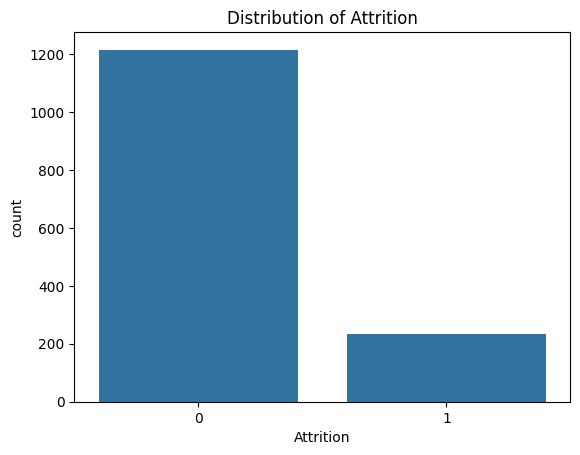

In [3]:
sns.countplot(x='Attrition', data=df)
plt.title('Distribution of Attrition')
plt.show()

In [4]:
df['Attrition'].value_counts(normalize=True)

Attrition
0    0.839088
1    0.160912
Name: proportion, dtype: float64

# Univariate Analysis

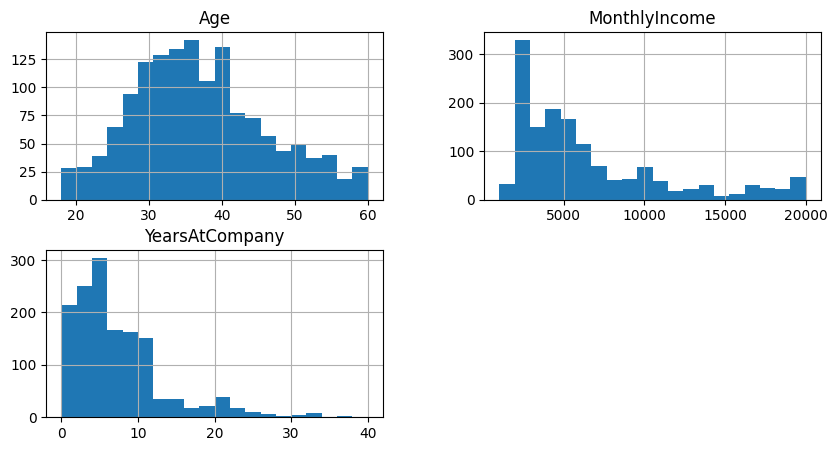

In [5]:
num_cols = ['Age','MonthlyIncome','YearsAtCompany']
df[num_cols].hist(bins=20, figsize=(10,5))
plt.show()


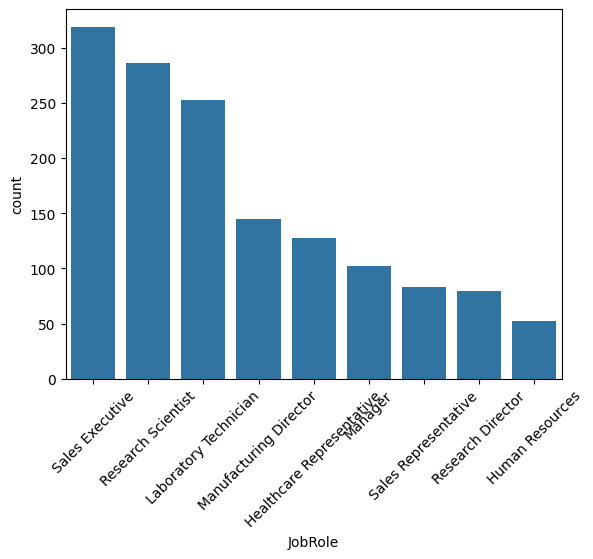

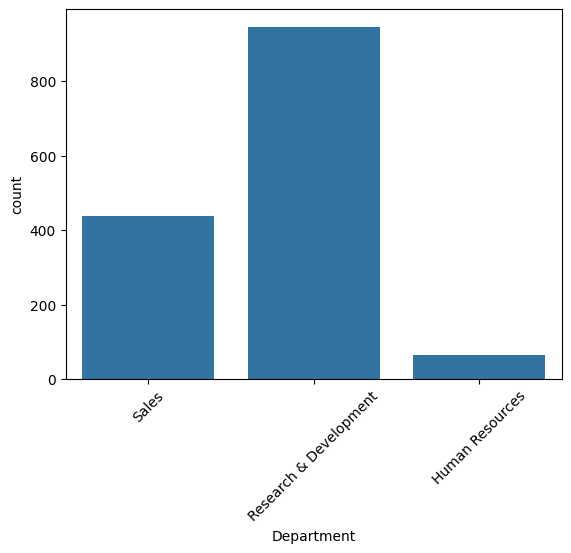

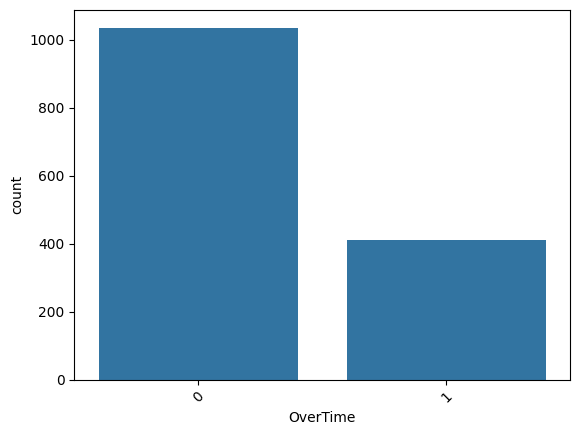

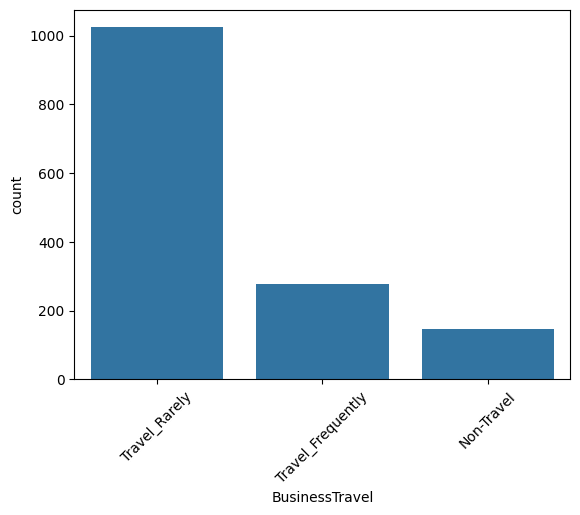

In [6]:
cat_cols = ['JobRole','Department','OverTime','BusinessTravel']
for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.show()


# Bivariate Analysis(Feature vs Target)

# OverTime vs Attrition

<Axes: xlabel='OverTime', ylabel='count'>

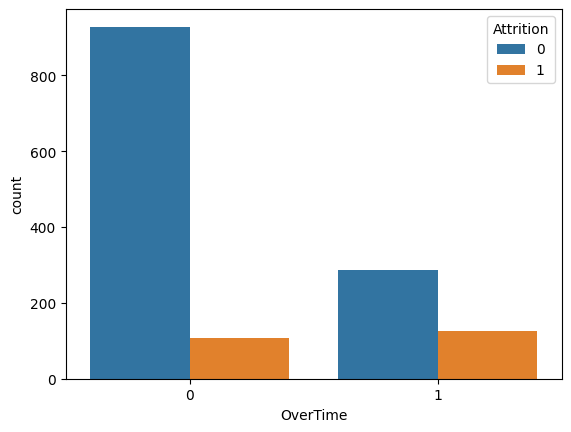

In [7]:
sns.countplot(x='OverTime', hue='Attrition', data=df)


# MonthlyIncome vs Attrition

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

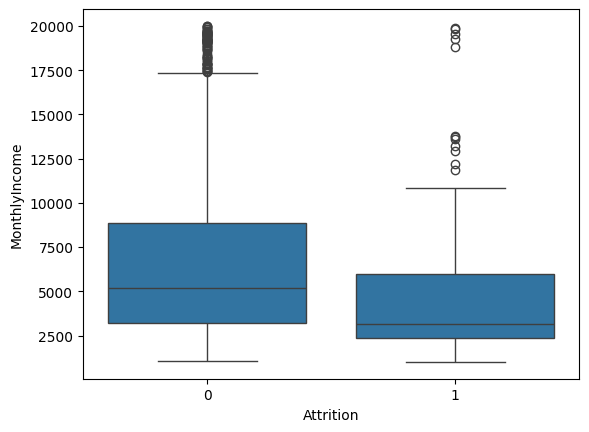

In [8]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)


# WorkLifeBalance vs Attrition

<Axes: xlabel='WorkLifeBalance', ylabel='count'>

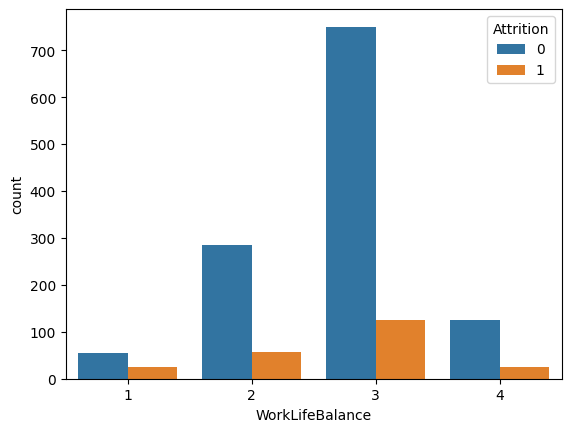

In [9]:
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df)


# JobRole vs Attrition

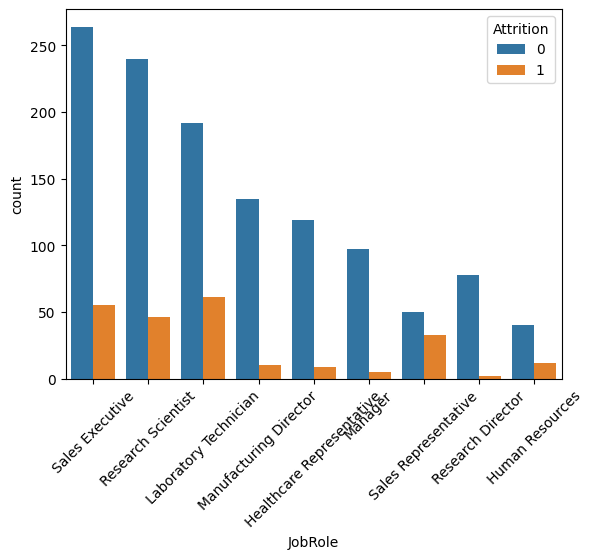

In [10]:
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.xticks(rotation=45)
plt.show()

# Correlation Analysis

In [11]:
df.shape

(1448, 22)

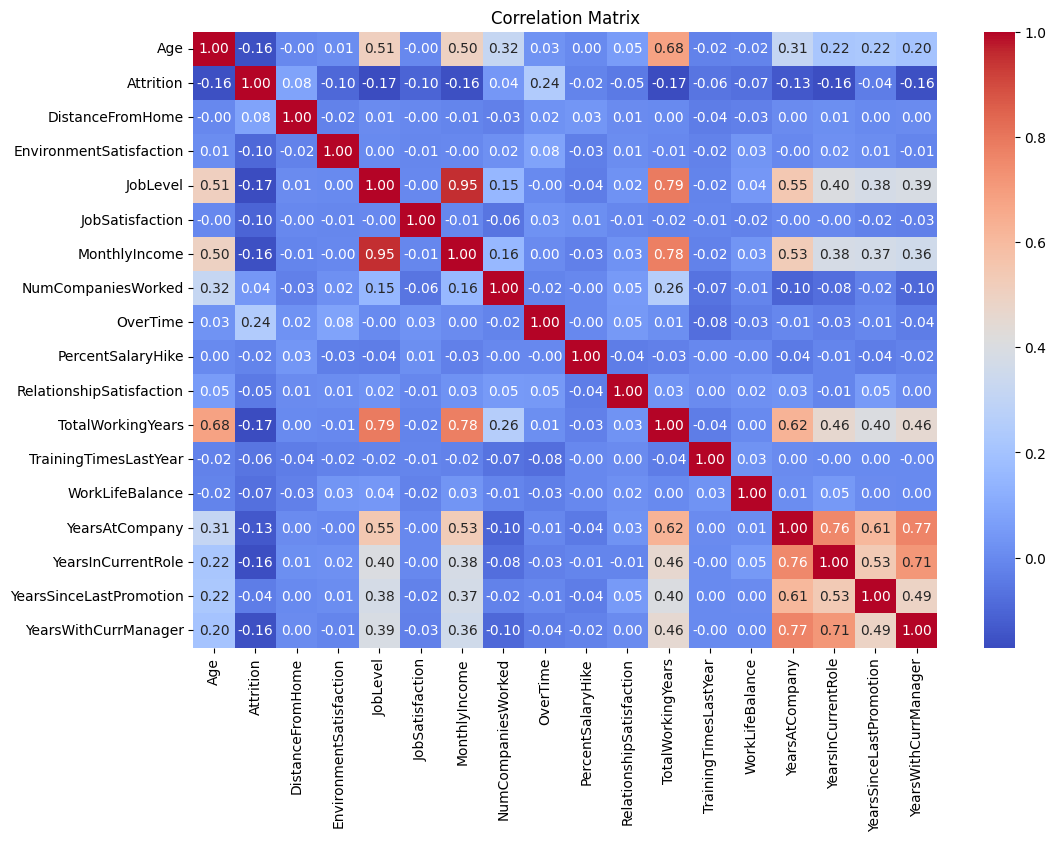

In [13]:
num_df = df.select_dtypes(include=['int64','float64'])
corr_matrix = num_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering

In [22]:
col=[]
for i in df.select_dtypes(include='object'):
    col.append(i)
    print(df[i].value_counts())
    

BusinessTravel
Travel_Rarely        1024
Travel_Frequently     277
Non-Travel            147
Name: count, dtype: int64
Department
Research & Development    946
Sales                     439
Human Resources            63
Name: count, dtype: int64
Gender
Male      870
Female    578
Name: count, dtype: int64
JobRole
Sales Executive              319
Research Scientist           286
Laboratory Technician        253
Manufacturing Director       145
Healthcare Representative    128
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


In [23]:
col

['BusinessTravel', 'Department', 'Gender', 'JobRole']

# Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe= OneHotEncoder()
for i in col:
    if i=='Gender':
        df[i]=le.fit_transform(df[i])
    else:
        df[i]=ohe.fit_transform(df[[i]]).toarray()
        
        

In [25]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EnvironmentSatisfaction,Gender,JobLevel,JobRole,JobSatisfaction,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0.0,0.0,1,2,0,2,0.0,4,...,1,11,1,8,0,1,6,4,0,5
1,49,0,0.0,0.0,8,3,1,2,0.0,2,...,0,23,4,10,3,3,10,7,1,7
2,37,1,0.0,0.0,2,4,1,1,0.0,3,...,1,15,2,7,3,3,0,0,0,0
3,33,0,0.0,0.0,3,4,0,1,0.0,3,...,1,11,3,8,3,3,8,7,3,0
4,32,0,0.0,0.0,2,4,1,1,0.0,4,...,0,13,3,8,2,2,7,7,3,6


In [26]:
df.dtypes

Age                           int64
Attrition                     int64
BusinessTravel              float64
Department                  float64
DistanceFromHome              int64
EnvironmentSatisfaction       int64
Gender                        int64
JobLevel                      int64
JobRole                     float64
JobSatisfaction               int64
MonthlyIncome                 int64
NumCompaniesWorked            int64
OverTime                      int64
PercentSalaryHike             int64
RelationshipSatisfaction      int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany                int64
YearsInCurrentRole            int64
YearsSinceLastPromotion       int64
YearsWithCurrManager          int64
dtype: object

# Saving data into sql workbench

In [27]:
from sqlalchemy import create_engine
# MySQL connection credentials
username = "root"
password = "root123"
host = "localhost"
port = 3306
database = "hr(attrition)"  # your database name

# Correct SQLAlchemy engine (no backticks in URL)
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")

# Insert data into MySQL table
df.to_sql('hr_data', con=engine, if_exists='replace', method='multi', index=False,chunksize=1000)


1448